DEBUT CALCUL.
DEBUT EULER :  2  -  1
FIN EULER.
DEBUT CALCUL.
DEBUT EULER :  2  -  2
FIN EULER.
DEBUT CALCUL.
DEBUT EULER :  2  -  3
FIN EULER.
DEBUT CALCUL.
DEBUT EULER :  2  -  4
FIN EULER.
DEBUT CALCUL.
DEBUT EULER :  2  -  5
FIN EULER.
DEBUT CALCUL.
DEBUT EULER :  2  -  6
FIN EULER.
DEBUT CALCUL.
DEBUT EULER :  2  -  7
FIN EULER.
DEBUT CALCUL.
DEBUT EULER :  2  -  8
FIN EULER.
DEBUT CALCUL.
DEBUT EULER :  2  -  9
FIN EULER.
DEBUT CALCUL.
DEBUT EULER :  2  -  10
FIN EULER.
DEBUT CALCUL.
DEBUT EULER :  2  -  11
FIN EULER.
DEBUT CALCUL.
DEBUT EULER :  2  -  12
FIN EULER.
DEBUT CALCUL.
DEBUT EULER :  2  -  13
FIN EULER.
DEBUT CALCUL.
DEBUT EULER :  2  -  14
FIN EULER.
DEBUT CALCUL.
DEBUT EULER :  2  -  15
FIN EULER.
DEBUT CALCUL.
DEBUT EULER :  2  -  16
FIN EULER.
DEBUT CALCUL.
DEBUT EULER :  2  -  17
FIN EULER.
DEBUT CALCUL.
DEBUT EULER :  2  -  18
FIN EULER.
DEBUT CALCUL.
DEBUT EULER :  2  -  19
FIN EULER.
DEBUT CALCUL.
DEBUT EULER :  2  -  20
FIN EULER.
DEBUT CALCUL.
DEBUT EULER :  

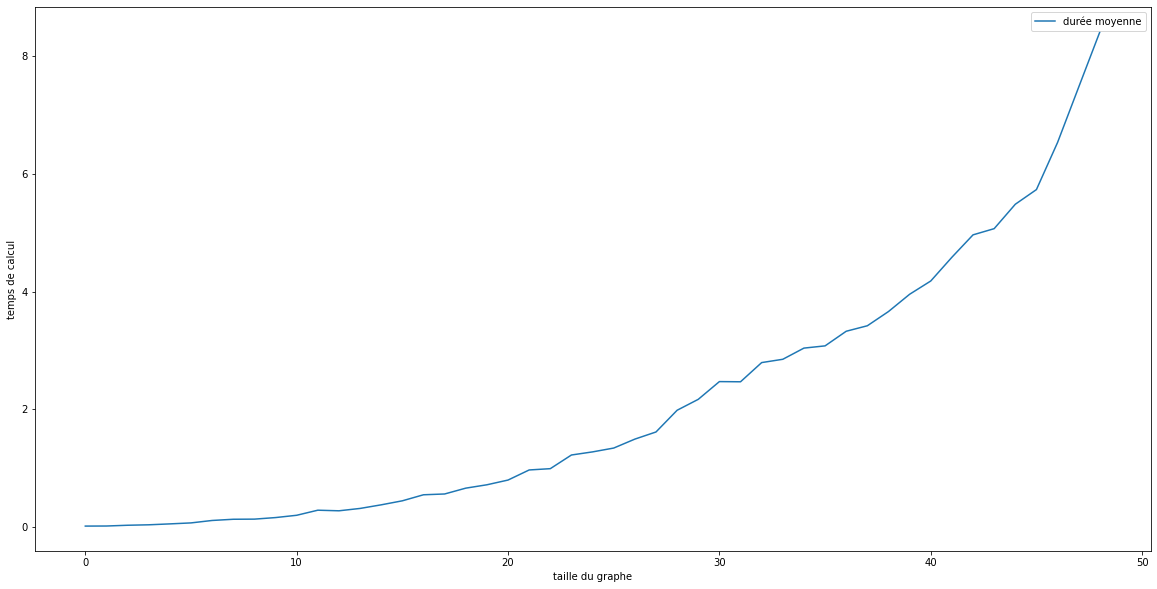

In [43]:
import os
import random
import time
import statistics
import numpy as np
from matplotlib import pyplot as plt


def can_euler(matrix, s):
    for line in matrix:
        if sum(list(map(lambda n: n[0], line))) <= s / 2: return False
    return True

def random_graphe(size):
    b = np.random.choice((True, False), size=(size,size), p=[0.4, 0.6])
    b_symm = np.logical_or(b, b.T)
    matrix = b_symm.astype(int)
    matrix = list(map(lambda line: list(map((lambda n: [0,0] if n == 0 else [1,0]), line)), matrix))
    for k, line in enumerate(matrix):
        for j, col in enumerate(line):
            if col != [1,0]: continue
            number = random.randint(1,15)
            matrix[k][j] = [1,number]
            matrix[j][k] = [1,number]
    return matrix

def operation_on_matrix(matrix, current, index, operation):
    if current == index:
        matrix[current][index][0] += operation
    else:
        matrix[current][index][0] += operation
        matrix[index][current][0] += operation
    return matrix

def euler_cycle(matrix, stack, current, passed):
    #print(len(stack), " - ", len(passed))
    while matrix[current][current][0] != 0:
        matrix = operation_on_matrix(matrix, current, current, -1)
        stack.append(current)
    for i in range(len(matrix)):
        if matrix[current][i][0] >= 1:
            stack.append(current)
            matrix = operation_on_matrix(matrix, current, i, -1)
            if current not in passed and sum(list(map(lambda n: n[0], matrix[current]))) == 0 : passed.append(current)
            if i not in passed and len(passed) == len(matrix) - 1 and sum(list(map(lambda n: n[0], matrix[i]))) == 0 :
                passed.append(i)
                stack.append(i)
            #print("index : ", i, " | curr : ", current)
            #print("passed : ", len(passed), " | matrix : ", len(matrix))
            #print("passed : ", passed)
            #print("stack : ", stack)
            #for l in matrix: print(l)
            if euler_cycle(matrix, stack, i, passed):
                return stack
            else:
                matrix = operation_on_matrix(matrix, i, stack[-1], 1)
                if current in passed: passed.remove(current)
                current = stack[-1]
                del stack[-1]
    if len(passed) != len(matrix): return False
    return stack

def to_euler(matrix):
    #for line in matrix: print(line)
    not_pair = []
    for index, line in enumerate(matrix):
        nodes,weights = zip(*line)
        if (sum(nodes) + nodes[index]) % 2 != 0:
            not_pair.append(index)
    for index in range(0, len(not_pair), 2):
        #print("\n", not_pair[index], " - ", not_pair[index + 1], "\n")
        path = dijkstra(matrix, not_pair[index], not_pair[index + 1], [], {})
        #print(path, "\n")
        current = not_pair[index + 1]
        while current != not_pair[index]:
            matrix = operation_on_matrix(matrix, current, path[current][0], 1)
            current = path[current][0]
    #for line in matrix: print(line)



def dijkstra(matrix, node_a, node_b, links, total):
    """
    :param matrix: la matrice
    :param node_a: le noeud actuel
    :param node_b: le noeud final
    :param links: les liens
    :param total: les liens "valides"
    :return: le chemin
    """

    for link in links:
        if link[1] in total:
             links.remove(link)

    for index, node in enumerate(matrix[node_a]):
        if node[0] >= 1 and index != node_a:
            if node_a in total:
                if index == total[node_a][0]:
                    continue
                links.append([node_a, index, node[1] + total[node_a][1]])
            else:
                #print("node : ",node_a, "index : ",index, "noeud :", node)
                links.append([node_a, index, node[1]])

    fr,to,we = zip(*links)
    #min_link = links[we.index(min(we))]
    minimal = -1
    min_link = []

    #j'avais fait un truc plus opti mais je l'ai perdu => flemme
    for link in links:
        if link[1] in total:
            links.remove(link)
            continue
        if minimal == -1 or minimal > link[2]:
            minimal = link[2]
            min_link = link


    #print("links : ", len(links), " total : ", len(total))
    total[min_link[1]] = [min_link[0], min_link[2]]
    if node_b not in total:
        total = dijkstra(matrix, min_link[1], node_b, links, total)
    return total

size = 80

moy = []
for i in range(2, 51):
    size = i
    total = []
    for j in range(1, 51):
        print('DEBUT CALCUL.')
        m = random_graphe(size)
        while not can_euler(m, size):
           m = random_graphe(size)
        to_euler(m)

        print('DEBUT EULER : ', i, " - ", j)

        start = time.perf_counter()

        r = euler_cycle(m, [], 0, [])

        total.append((time.perf_counter() - start)*1000)

        print('FIN EULER.')
        #print(r)
    moy.append(statistics.mean(total))
plt.figure(figsize=(20,10))
plt.xlabel('taille du graphe')
plt.ylabel('temps de calcul')
plt.plot(moy, label='durée moyenne')
plt.legend()
plt.show()

In [41]:
size = 8
m = random_graphe(size)
while not can_euler(m, size):
   m = random_graphe(size)
to_euler(m)
for line in m: print(line)

[[1, 3], [2, 3], [1, 14], [0, 0], [1, 4], [1, 9], [0, 0], [1, 15]]
[[2, 3], [1, 13], [1, 12], [1, 8], [1, 13], [1, 11], [1, 6], [1, 10]]
[[1, 14], [1, 12], [0, 0], [1, 5], [1, 9], [0, 0], [1, 5], [1, 14]]
[[0, 0], [1, 8], [1, 5], [0, 0], [0, 0], [3, 2], [1, 12], [2, 2]]
[[1, 4], [1, 13], [1, 9], [0, 0], [1, 12], [2, 2], [1, 7], [0, 0]]
[[1, 9], [1, 11], [0, 0], [3, 2], [2, 2], [0, 0], [2, 4], [1, 11]]
[[0, 0], [1, 6], [1, 5], [1, 12], [1, 7], [2, 4], [1, 7], [0, 0]]
[[1, 15], [1, 10], [1, 14], [2, 2], [0, 0], [1, 11], [0, 0], [0, 0]]
